# Ratajczyk


In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Iterable, Tuple, Callable
import time

2.1.


In [53]:
def read_image(
        i: int, 
        is_raw_image: bool = True,
        load_gray: bool = True,
        folder: str = "pedestrian"
        ) -> np.ndarray: 
    return cv2.imread(folder+"/input/in%06d.jpg" % i if is_raw_image else folder+"/groundtruth/gt%06d.png" % i, 0 if load_gray else -1)

In [18]:
# for i in range(300, 1100, 3):
#     I = read_image(i)
#     cv2.imshow("I",I)
#     cv2.waitKey(10)
# cv2.destroyAllWindows()

2.2.

In [19]:
GLOBAL_THRESHOLD: int = 100

def generate_differential_images(start: int = 2, folder: str = "pedestrian") -> Iterable[np.ndarray]:
    previous: np.ndarray = read_image(start-1, folder=folder).astype(int)
    for i in range(start, 1100):
        current: np.ndarray = read_image(i, folder=folder).astype(int)
        yield cv2.absdiff(current, previous).astype(np.uint8)
        previous = current


def mask(image) -> np.ndarray:
    return (cv2.threshold(image, 0, 255, cv2.THRESH_OTSU)[1]*(np.max(image)>GLOBAL_THRESHOLD).astype(np.uint8))*255

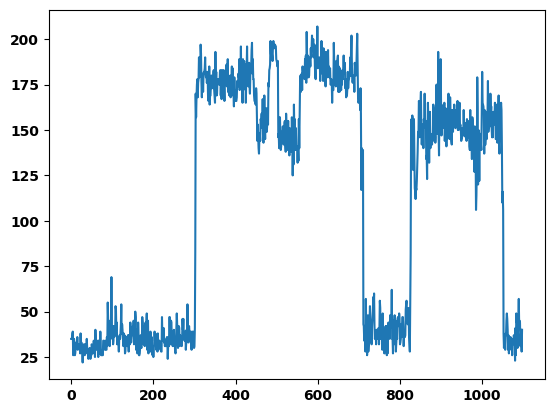

In [20]:
plt.plot([np.max(image) for image in generate_differential_images()])
plt.show()

In [54]:
images: List[np.ndarray] = [mask(image)*255 for image in generate_differential_images()]

for image in images:
    cv2.imshow("I",image)
    cv2.waitKey(10)
cv2.destroyAllWindows()



In [56]:
def index_analysis(start: int = 300) -> None:
    kernel: np.ndarray = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(19,21))
    raw: List[np.ndarray] = [read_image(i, load_gray=False) for i in range(start, 1100)]
    processed: List [np.ndarray] = [cv2.morphologyEx(mask(image), cv2.MORPH_CLOSE, kernel) for image in generate_differential_images(start)]
    for raw_img, processed_img in zip(raw, processed):
        image = raw_img.copy()
        _, _, stats, centroids = cv2.connectedComponentsWithStats(processed_img)
        if stats.shape[0] > 1:
            pi = np.argmax(stats[1:,4]) + 1
            cv2.rectangle(image,(stats[pi,0],stats[pi,1]),(stats[pi,0]+stats[pi,2],stats[pi,1]+stats[pi,3]),(255,0,0),2)
            cv2.putText(image,"%f" % stats[pi,4],(stats[pi,0],stats[pi,1]),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,0,0))
            cv2.putText(image,"%d" %pi,(np.int(centroids[pi,0]),np.int(centroids[pi,1])),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0))
        cv2.imshow("I",image)
        cv2.waitKey(10)
    cv2.destroyAllWindows()




In [57]:
index_analysis()

C:\Users\igor\AppData\Local\Temp\ipykernel_24044\2147741398.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cv2.putText(image,"%d" %pi,(np.int(centroids[pi,0]),np.int(centroids[pi,1])),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0))


In [24]:
def index_analysis(start: int = 300) -> None:
    kernel: np.ndarray = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(19,21))
    raw: List[np.ndarray] = [read_image(i, load_gray=False) for i in range(start, 1100)]
    processed: List [np.ndarray] = [cv2.morphologyEx(mask(image), cv2.MORPH_CLOSE, kernel) for image in generate_differential_images(start)]
    for raw_img, processed_img in zip(raw, processed):
        image = raw_img.copy()
        _, _, stats, centroids = cv2.connectedComponentsWithStats(processed_img)
        if stats.shape[0] > 1:
            pi = np.argmax(stats[1:,4]) + 1
            cv2.rectangle(image,(stats[pi,0],stats[pi,1]),(stats[pi,0]+stats[pi,2],stats[pi,1]+stats[pi,3]),(255,0,0),2)
            cv2.putText(image,"%f" % stats[pi,4],(stats[pi,0],stats[pi,1]),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,0,0))
            cv2.putText(image,"%d" %pi,(np.int(centroids[pi,0]),np.int(centroids[pi,1])),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0))
        cv2.imshow("I",processed_img*255)
        cv2.waitKey(10)
    cv2.destroyAllWindows()

In [25]:
def index_analysis(start: int = 300) -> None:
    kernel: np.ndarray = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(19,21))
    raw: List[np.ndarray] = [read_image(i, load_gray=False) for i in range(start, 1100)]

    kernel_dilate: np.ndarray = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,23))
    kernel_erode: np.ndarray = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,29))
    process: Callable[[np.ndarray], np.ndarray] = lambda image: cv2.morphologyEx(cv2.morphologyEx(mask(image), cv2.MORPH_CLOSE, kernel_dilate), cv2.MORPH_OPEN, kernel_erode)


    processed: List [np.ndarray] = [process(image) for image in generate_differential_images(start)]
    for raw_img, processed_img in zip(raw, processed):
        image = raw_img.copy()
        _, _, stats, centroids = cv2.connectedComponentsWithStats(processed_img)
        if stats.shape[0] > 1:
            pi = np.argmax(stats[1:,4]) + 1
            cv2.rectangle(image,(stats[pi,0],stats[pi,1]),(stats[pi,0]+stats[pi,2],stats[pi,1]+stats[pi,3]),(255,0,0),2)
            cv2.putText(image,"%f" % stats[pi,4],(stats[pi,0],stats[pi,1]),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,0,0))
            cv2.putText(image,"%d" %pi,(np.int(centroids[pi,0]),np.int(centroids[pi,1])),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0))
        cv2.imshow("I",processed_img*255)
        cv2.waitKey(10)
    cv2.destroyAllWindows()

In [26]:
def precision(image: np.ndarray, mask: np.ndarray) -> float:
    return (1+np.sum(np.logical_and(image, mask).astype(np.uint8)).astype(np.float64))/(np.sum(image).astype(np.float64)+1)

def recall(image: np.ndarray, mask: np.ndarray) -> float:
    return (1+np.sum(np.logical_and(image, mask).astype(np.uint8)).astype(np.float64))/(np.sum(mask).astype(np.float64)+1)

def f1_score(p: float, r: float) -> float:
    return 2*p*r/(p+r)

In [50]:
def calculate_metrics(folder: str = "pedestrian") -> Tuple[float]:
    f1_score_accumulator: np.ndarray = np.zeros(800, dtype=np.float64)
    precision_accumulator: np.ndarray = np.zeros(800, dtype=np.float64)
    recall_accumulator: np.ndarray = np.zeros(800, dtype=np.float64)
    kernel_dilate: np.ndarray = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,23))
    kernel_erode: np.ndarray = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,29))

    process: Callable[[np.ndarray], np.ndarray] = lambda image: cv2.morphologyEx(cv2.morphologyEx(mask(image), cv2.MORPH_CLOSE, kernel_dilate), cv2.MORPH_OPEN, kernel_erode)

    processed: List [np.ndarray] = [process(image).astype(np.uint32) for image in generate_differential_images(570, folder=folder)]
    ground_truth: List[np.ndarray] = [(read_image(i, False, folder=folder) > 200).astype(np.uint32) for i in range(570, 1100)]
    for idx, (image, ground_truth) in enumerate(zip(processed, ground_truth)):
        p: float = precision(image, ground_truth)
        r: float = recall(image, ground_truth)
        f1_score_accumulator[idx] = f1_score(p, r)
        precision_accumulator[idx] = p
        recall_accumulator[idx] = r
    return f1_score_accumulator, precision_accumulator, recall_accumulator
        
        

In [33]:
[x.mean() for x in calculate_metrics("pedestrian")]

[0.6074930495203416, 0.7015862082713709, 0.7104028203501638]

In [46]:
[x.mean() for x in calculate_metrics("office")]

[0.4786976207715013, 0.8436766598271693, 0.4845456806662709]

In [51]:
[x.mean() for x in calculate_metrics("highway/highway")]

[0.47733338676286435, 0.48036815140568073, 0.525055174935725]

In [28]:
images: List [np.ndarray] = [mask(image).astype(np.uint8) for image in generate_differential_images(300)]
ground_truth: List[np.ndarray] = [(read_image(i, False) > 200).astype(np.uint32) for i in range(300, 1100)]

def calculate_metrics_optimize(images, ground_truth) -> Tuple[float]:
    f1_score_accumulator: float = 0
    for image, ground_truth in zip(images, ground_truth):
        p: float = precision(image, ground_truth)
        r: float = recall(image, ground_truth)
        f1_score_accumulator += f1_score(p, r)
    return f1_score_accumulator/(len(images))

In [29]:
best_f1: float = 0.64
best_kernel: np.ndarray = None

start = time.time()
for i in range(7, 28, 4):       
    for j in range(21, 31, 2):
        kernel_dilate = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(i, j))
        dilated = [cv2.dilate(image, kernel_dilate) for image in images]    
        for k in range(7, 12, 2):
            for l in range(21, 31, 2):
                kernel_erode = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(k, l))
                eroded = [cv2.erode(image, kernel_erode) for image in dilated]
                f1 = calculate_metrics_optimize(eroded, ground_truth)
                if f1 > best_f1:
                    best_f1 = f1
                    best_kernel = (i, j, k, l)
                    print("Sol found at:", time.time()- start, "New best f1: ", best_f1, i, j, k, l)

Sol found at: 1.8248941898345947 New best f1:  0.646145689731538 7 21 7 23
Sol found at: 2.569916248321533 New best f1:  0.6518735560080883 7 21 7 25
Sol found at: 5.794006824493408 New best f1:  0.6593312928321652 7 21 9 23


KeyboardInterrupt: 